# **CIS 4190/5190 Homework 2 - Fall 2024**

In [328]:
import random
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

## **PennGrader Setup**
First, you'll need to set up the PennGrader, an autograder we are going to use throughout the semester. The PennGrader will automatically grade your answer and provide you with an instant feedback. Unless otherwise stated, you can resubmit up to a reasonable number of attempts (e.g. 100 attemptes per day). **We will only record your latest score in our backend database**.

After finishing each homework assignment, you must submit your iPython notebook to gradescope before the homework deadline. Gradescope will then retrive and display your scores from our backend database.

In [329]:
%%capture
!pip install penngrader-client

In [330]:
%%writefile student_config.yaml
grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Overwriting student_config.yaml


In [331]:
from penngrader.grader import *

## **Autograder Setup**
Enter your 8-digit PennID below:

In [332]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 86393681       # YOUR PENN-ID GOES HERE AS AN INTEGER#

Run the following cell to initialize the autograder. This autograder will let you submit your code directly from this notebook and immediately get a score.

**NOTE:** Remember we store your submissions and check against other student's submissions... so, not that you would, but no cheating.

In [333]:
# leave cis5190_fall24_HW22 as it is
grader = PennGrader('student_config.yaml', 'cis5190_fall24_HW22', STUDENT_ID, STUDENT_ID)
# import requests
# URL = "http://52.90.101.233:80/submit"

PennGrader initialized with Student ID: 86393681

Make sure this correct or we will not be able to store your grade


In [334]:
# Serialization code needed by the autograder
import inspect, sys
from IPython.core.magics.code import extract_symbols

def new_getfile(object, _old_getfile=inspect.getfile):
    if not inspect.isclass(object):
        return _old_getfile(object)

    # Lookup by parent module (as in current inspect)
    if hasattr(object, '__module__'):
        object_ = sys.modules.get(object.__module__)
        if hasattr(object_, '__file__'):
            return object_.__file__

    # If parent module is __main__, lookup by methods (NEW)
    for name, member in inspect.getmembers(object):
        if inspect.isfunction(member) and object.__qualname__ + '.' + member.__name__ == member.__qualname__:
            return inspect.getfile(member)
    else:
        raise TypeError('Source for {!r} not found'.format(object))
inspect.getfile = new_getfile

def grader_serialize(obj):
    cell_code = "".join(inspect.linecache.getlines(new_getfile(obj)))
    class_code = extract_symbols(cell_code, obj.__name__)[0][0]
    return class_code

## **Datasets**
Next, we will download all datasets from Google Drive to your local runtime. After successful download, you may verify that all datasets are present in your colab instance.

HW1 Datasets:
- [cis519_hw1_diabetes_train.csv](https://drive.google.com/file/d/1wfZ375m-HOvtWb8fBUjZ2zbW5nkXtlVx/view?usp=sharing)
- [cis519_hw1_diabetes_test.csv](https://drive.google.com/file/d/14DGsr_eIHRGnDw4o7FVBFUVfg_MljzzO/view?usp=sharing)

In [335]:
if not os.path.exists("cis519_hw1_diabetes_train.csv"):
    !gdown --id 1wfZ375m-HOvtWb8fBUjZ2zbW5nkXtlVx
if not os.path.exists("cis519_hw1_diabetes_X_test.csv"):
    !gdown --id 14DGsr_eIHRGnDw4o7FVBFUVfg_MljzzO

In [336]:
train_df = pd.read_csv("cis519_hw1_diabetes_train.csv")
train_df

,OHQ575Q,INDFMPIR,LBDSGBSI,OHQ565,DIABETIC,OHX28CSC,OHX19SE,URDECPLC,BMXBMI,BMXWT,...,DMDEDUC2,RIDAGEYR,LBXTC,ALQ120Q,BMXWAIST,BPQ020,RIDRETH1,BMXLEG,RIAGENDR,BMXHT
0,NaN,1.52,28.0,NaN,0,NaN,0.0,0.0,20.2,59.2,...,NaN,18,154.0,NaN,75.5,2.0,5,42.0,1,171.0
1,NaN,3.09,28.0,NaN,0,NaN,NaN,NaN,21.1,61.8,...,3.0,57,224.0,1.0,90.7,2.0,2,39.0,2,171.0
2,NaN,5.00,29.0,NaN,0,NaN,NaN,NaN,22.1,63.1,...,4.0,29,170.0,2.0,81.2,2.0,2,40.0,2,169.0
3,NaN,5.00,NaN,NaN,0,NaN,NaN,NaN,NaN,6.8,...,NaN,0,NaN,NaN,NaN,NaN,1,NaN,2,NaN
4,NaN,2.13,31.0,NaN,0,NaN,NaN,0.0,21.7,65.8,...,3.0,61,115.0,7.0,77.2,1.0,3,41.5,1,174.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8135,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,2,NaN,NaN,NaN,NaN,5,NaN,2,NaN
8136,NaN,1.29,31.0,NaN,0,NaN,NaN,0.0,30.6,87.9,...,1.0,79,184.0,0.0,117.5,2.0,1,39.0,1,169.4
8137,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,31.7,90.4,...,NaN,17,NaN,NaN,108.7,2.0,4,41.7,2,168.9
8138,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,2.0,58,NaN,NaN,NaN,2.0,4,NaN,1,NaN


#### **NOTE: Results of sections marked as "manually graded" should be submitted along with the written homework solutions.**

# **1. Logistic Regression [23pts]**

## **1.1. Logistic Regression Implementation [18 pts, autograded]**

Implement logistic regression with both L1 and L2 regularization by completing the LogisticRegression class.  

Your class must implement the following API:

* `__init__(alpha, tol, max_iter, theta_init, penalty, lambd)`
* `sigmoid(x)`
* `compute_cost(theta, X, y)`
* `compute_gradient(theta, X, y)`
* `has_converged(theta_old, theta_new)`
* `fit(X, y)`
* `predict_proba(X)`
* `predict(X)`

Note that these methods have already been defined correctly for you in the LogisticRegression class. **DO NOT** change the API.

---

### **1.1.1. Sigmoid Function [1 pt]**

You should begin by implementing the `sigmoid` function.  As you may know, the sigmoid function $\sigma(x)$ is mathematically defined as follows.

> $\sigma(x) = \frac{1}{1\ +\ \text{exp}(-x)}$

**Be certain that your sigmoid function works with both vectors and matrices** --- for either a vector or a matrix, you function should perform the sigmoid function on every element.

---

### **1.1.2. Cost Function [5 pts]**

The `compute_cost` function should compute the cost for a given $\theta$ vector. The cost is a scalar value given by:

> $
\mathcal{L}({\theta}) = -\sum_{i =1}^N [ y_i\log(h_{{\theta}}({x}_i)) + (1 - y_i)\log(1 - h_{{\theta}}({x}_i))]
$

where
> $
h_{\theta}(x_{i}) = \sigma(\theta^{T}x_{i})
$


L1 Regularisation Loss:
>$
\mathcal{L1}({\theta}) = \mathcal{L}({\theta}) + \lambda \sum_{j = 1}^D  |{\theta}_j|
$

L2 Regularisation Loss:
>$
\mathcal{L2}({\theta}) = \mathcal{L}({\theta}) + \lambda \sum_{j = 1}^D  {\theta}_j^2
$

$N$ is the number of training samples and $D$ is the number of features (excluding the intercept term). $\theta$ is a $D + 1$ dimensional vector, with the first element being the intercept term. Note that we do not include the intercept in the regularization terms.

---

### **1.1.3. Gradient of the Cost Function [5 pts]**

The `compute_gradient` function should compute the gradient of the cost function at a given $\theta$.

---

### **1.1.4. Convergence Check [1 pt]**

The `has_converged` function should return whether gradient descent algorithm has converged or not. Refer 2.1.5 for convergence condition.

---

### **1.1.5. Training [3 pts]**

The `fit` method should train the model via gradient descent, relying on the cost and gradient functions. The trained weights/coefficients must be stored as `theta_`. The weights start as a zero vector. The weights and the corresponding cost after every gradient descent iteration must be stored in `hist_theta_` and `hist_cost_` respectively.

* The gradient descent stops or converges when $\theta$ stops changing or changes negligibly between consecutive iterations, i.e., when
$\| {\theta}_\mathit{new} -  {\theta}_\mathit{old} \|_2 \leq \epsilon$,
for some small $\epsilon$ (e.g., $\epsilon$ = 1E-4). $\epsilon$ is stored as `tol` (short for tolerance).

* To ensure that the function terminates, we should set a maximum limit for the number of gradient descent iterations irrespective of whether $\theta$ converges or not. The limit is stored as `max_iter`.

* `alpha` is the learning rate of the gradient descent algorithm.

---

### **1.1.6. Predict Probability [1 pt]**

The `predict_probability` function should predict the probabilities that the data points in a given input data matrix belong to class 1.

---

### **1.1.7. Predict [2 pts]**

The `predict` function should predict the classes of the data points in a given input data matrix.

In [337]:
class LogisticRegression:

    """
    Logistic Regression (aka logit, MaxEnt) classifier.

    Parameters
    ----------
    alpha: float, default=0.01
        Learning rate
    tol : float, default=0.0001
        Tolerance for stopping criteria
    max_iter : int, default=10000
        Maximum number of iterations of gradient descent
    theta_init: None (or) numpy.ndarray of shape (D + 1,)
        The initial weights; if None, all weights will be zero by default
    penalty : string, default = None
        The type of regularization. The other acceptable options are l1 and l2
    lambd : float, default = 1.0
        The parameter regularisation constant (i.e. lambda)

    Attributes
    ----------
    theta_ : numpy.ndarray of shape (D + 1,)
        The value of the coefficients after gradient descent has converged
        or the number of iterations hit the maximum limit
    hist_theta_ : numpy.ndarray of shape (num_iter, D + 1) where num_iter is the number of gradient descent iterations
        Stores theta_ after every gradient descent iteration
    hist_cost_ : numpy.ndarray of shape (num_iter,) where num_iter is the number of gradient descent iterations
        Stores cost after every gradient descent iteration

    """

    def __init__(self, alpha=0.01, tol=0.0001, max_iter=10000, theta_init=None, penalty = None, lambd = 1.0):

        self.alpha = alpha
        self.tol = tol
        self.max_iter = max_iter
        self.theta_init = theta_init
        self.penalty = penalty
        self.lambd = lambd
        self.theta_ = None
        self.hist_cost_ = None
        self.hist_theta_ = None

    def get_params(self, deep=True):
        # a function needed for using cross_val_score function from sklearn.model_selection
        return {"alpha": self.alpha, "max_iter": self.max_iter, "lambd" : self.lambd, "penalty" : self.penalty}

    def sigmoid(self, x):

        """
        Compute the sigmoid value of the argument.

        Parameters
        ----------
        x: numpy.ndarray

        Returns
        -------
        out: numpy.ndarray
            The sigmoid value of x
        """

        # TODO START: Complete the function
        sigmoid = 1 / (1 + np.exp(-x))
        return sigmoid

        # TODO END

    def compute_cost(self, theta, X, y):

        """
        Compute the cost/objective function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        cost: float
            The cost as a scalar value
        """

        # TODO START: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)
        # DO NOT use np.dot for this function as it can possibly return nan. Use a combination of np.nansum and np.multiply.

        # CASE 1: NO PENALTY
        cost = np.sum(-y * np.log(self.sigmoid(np.dot(X, theta))) - (1 - y) * np.log(1 - self.sigmoid(np.dot(X, theta))))

        # CASE 2: L1 PENALTY
        if self.penalty == "l1":
            cost += self.lambd * np.sum(np.abs(theta[1:]))


        # CASE 3: L2 PENALTY
        if self.penalty == "l2":
            cost += self.lambd * np.sum(np.square(theta[1:]))

        return cost
        # TODO END

    def compute_gradient(self, theta, X, y):

        """
        Compute the gradient of the cost function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        gradient: numpy.ndarray of shape (D + 1,)
            The gradient values
        """

        # TODO START: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)
        gradient = np.dot(X.T, self.sigmoid(np.dot(X, theta)) - y)
        if self.penalty == "l1":
            gradient[1:] += self.lambd * np.sign(theta[1:])
        if self.penalty == "l2":
            gradient[1:] += 2 * self.lambd * theta[1:]
        return gradient

        # TODO END

    def has_converged(self, theta_old, theta_new):
        """
        Return whether gradient descent has converged.

        Parameters
        ----------
        theta_old: numpy.ndarray of shape (D + 1,)
            The weights prior to the update by gradient descent
        theta_new: numpy.ndarray of shape (D + 1,)
            The weights after the update by gradient descent

        Returns
        -------
        converged: bool
            Whether gradient descent converged or not
        """

        # TODO START: Complete the function
        if np.linalg.norm(theta_new - theta_old) <= self.tol:
            return True
        else:
            return False

        # TODO END

    def fit(self, X, y):
      """
      Compute the coefficients using gradient descent and store them as theta_.

      Parameters
      ----------
      X: numpy.ndarray of shape (N, D)
          The features matrix
      y: numpy.ndarray of shape (N,)
          The target variable array

      Returns
      -------
      Nothing
      """
      N, D = X.shape

      # Add a column of ones at the beginning for the bias term
      ones_col = np.ones((N, 1))
      X = np.hstack((ones_col, X))

      # Initialize the weights
      if self.theta_init is None:
          theta_old = np.zeros(D + 1)
      else:
          theta_old = self.theta_init

      # Store the initial weights and cost
      self.hist_theta_ = [theta_old]
      cost = self.compute_cost(theta_old, X, y)
      self.hist_cost_ = [cost]

      # Gradient descent loop
      for _ in range(self.max_iter):
          # Compute new weights
          theta_new = theta_old - self.alpha * self.compute_gradient(theta_old, X, y)

          # Store weights and cost at each step
          self.hist_theta_.append(theta_new)
          cost = self.compute_cost(theta_new, X, y)
          self.hist_cost_.append(cost)

          # Check for convergence
          if self.has_converged(theta_old, theta_new):
              break

          # Update old weights for the next iteration
          theta_old = theta_new

      # Convert historical lists to arrays for consistency
      self.hist_theta_ = np.array(self.hist_theta_)
      self.hist_cost_ = np.array(self.hist_cost_)

      # Store the final learned weights
      self.theta_ = theta_new

    def predict_proba(self, X):

        """
        Predict the probabilities that the data points in X belong to class 1.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_hat: numpy.ndarray of shape (N,)
            The predicted probabilities that the data points in X belong to class 1
        """

        N = X.shape[0]
        X = np.hstack((np.ones((N, 1)), X))

        # TODO START: Complete the function
        y_hat = self.sigmoid(np.dot(X, self.theta_))
        return y_hat

        # TODO END

    def predict(self, X):

        """
        Predict the classes of the data points in X.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_pred: numpy.ndarray of shape (N,)
            The predicted class of the data points in X
        """

        # TODO START: Complete the function
        y_pred = np.where(self.predict_proba(X) >= 0.5, 1, 0)
        return y_pred

        # TODO END

In [338]:
def test_log_reg_sigmoid(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression()
    test_case = np.array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763])
    student_ans = student_lr_clf.sigmoid(test_case)
    required_ans = np.array([0.83539354, 0.35165864, 0.3709434 , 0.25483894, 0.70378922])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_sigmoid(LogisticRegression)

In [339]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_sigmoid', answer = grader_serialize(LogisticRegression))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [340]:
def test_log_reg_compute_cost(StudentLogisticRegression):

    test_case_theta = np.array([ 1.62434536, -0.61175641])
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])

    student_lr_clf = StudentLogisticRegression()
    student_ans = student_lr_clf.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 7.467975765663204

    assert np.abs(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l1", lambd=0.1)
    student_ans = student_lr_clf.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 7.52915138076548

    assert np.abs(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l2", lambd=0.1)
    student_ans = student_lr_clf.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 7.505400330283089
    assert np.abs(student_ans - required_ans) <= 1e-2

test_log_reg_compute_cost(LogisticRegression)

In [341]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_compute_cost', answer = grader_serialize(LogisticRegression))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [342]:
def test_log_reg_compute_gradient(StudentLogisticRegression):

    test_case_theta = np.array([ 1.62434536, -0.61175641])
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])

    student_lr_clf = StudentLogisticRegression()
    student_ans = student_lr_clf.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.20203139])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l1", lambd=0.1)
    student_ans = student_lr_clf.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.30203139])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l2", lambd=0.1)
    student_ans = student_lr_clf.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.32438267])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_compute_gradient(LogisticRegression)

In [343]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_compute_gradient', answer = grader_serialize(LogisticRegression))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [344]:
def test_log_reg_has_converged(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression()
    test_case_theta_old = np.array([ 1.62434536, -0.61175641])
    test_case_theta_new = np.array([1.624345, -0.611756])
    student_ans = student_lr_clf.has_converged(test_case_theta_old, test_case_theta_new)
    required_ans = True

    assert student_ans == required_ans

test_log_reg_has_converged(LogisticRegression)

In [345]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_has_converged', answer = grader_serialize(LogisticRegression))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [346]:
def test_log_reg_fit(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression(max_iter=5)
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.hist_theta_
    required_ans = np.array([[ 0.        ,  0.        ,  0.        ],
                             [ 0.005     , -0.00597503,  0.00564325],
                             [ 0.01006813, -0.01184464,  0.0111865 ],
                             [ 0.01520121, -0.01761226,  0.01663348],
                             [ 0.02039621, -0.02328121,  0.02198778],
                             [ 0.02565018, -0.0288547 ,  0.02725288]])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_fit(LogisticRegression)

In [347]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_fit', answer = grader_serialize(LogisticRegression))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [348]:
def test_log_reg_predict_proba(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression(max_iter=5)
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.predict_proba(test_case_X)
    required_ans = np.array([0.49052814, 0.5029122 , 0.48449386, 0.48864172, 0.50241207])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_predict_proba(LogisticRegression)

In [349]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_predict_proba', answer = grader_serialize(LogisticRegression))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [350]:
def test_log_reg_predict(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression(max_iter=5)
    np.random.seed(1)
    test_case_X = np.random.randn(50, 2)
    test_case_y = np.random.randint(0, 2, 50)
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.predict(test_case_X)
    required_ans = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
                             0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

    assert np.mean(np.abs(student_ans - required_ans)) <= 0.02

test_log_reg_predict(LogisticRegression)

In [351]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_predict', answer = grader_serialize(LogisticRegression))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **1.2. Effect of learning rate on gradient descent [5 pts, manually graded]**



The dataset contains two features - scores in two exams and the target variable is whether the student was admitted into a college or not. Your task for this question is to use this dataset and plot the variation of cost function with respect to the number of gradient descent iterations for different learning rates. Perform the following steps.

1. Scale the features using StandardScaler
2. For each of the learning rates - {0.001, 0.01, 0.1, 0.25}, fit a logistic regression model to the scaled data by running a maximum of 100 iterations of gradient descent with L2 penalty and $\lambda$ as 0.001.
3. Show the variation of the cost (stored in `hist_cost_`) with respect to the number of iterations for all the learning rates in the same plot.

Submit the plot along with the written homework solutions. The plot should have an appropriate title, axes labels, and legend. Briefly comment on the effect of increasing learning rate and what would be the best learning rate among the four values based on the plot.

Run the below cell to download the dataset.

In [352]:
if not os.path.exists("cis519_hw2_admit.csv"):
    !gdown --id 1CSD1vA9qZucuevxCuaOwr91tBaZcjNNh

train_df = pd.read_csv("cis519_hw2_admit.csv")

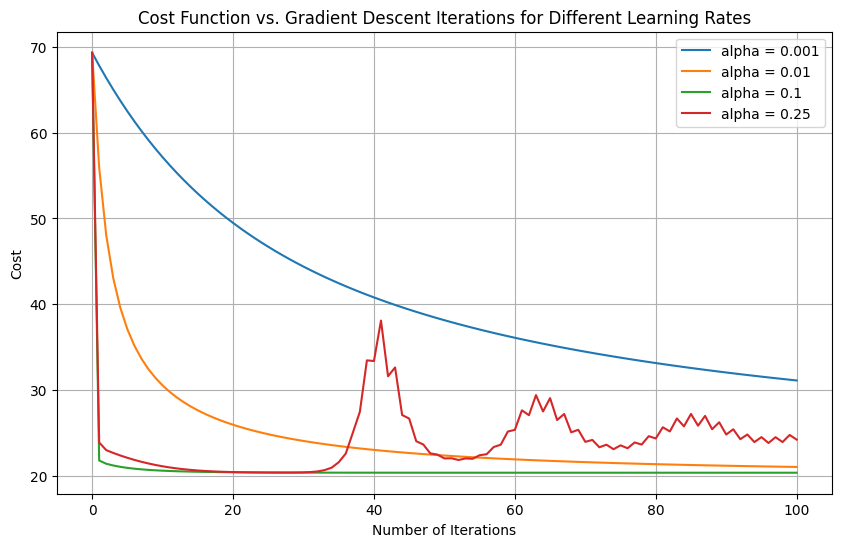

In [353]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load and scale the data
X = train_df[['Exam 1 Score', 'Exam 2 Score']].values
y = train_df['Admit'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train models with different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.25]
max_iter = 100
lambd = 0.001

plt.figure(figsize=(10, 6))

for alpha in learning_rates:
    model = LogisticRegression(alpha=alpha, max_iter=max_iter, penalty='l2', lambd=lambd)
    model.fit(X_scaled, y)
    plt.plot(model.hist_cost_, label=f'alpha = {alpha}')

# Step 3: Plot the cost function variations
plt.title('Cost Function vs. Gradient Descent Iterations for Different Learning Rates')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()

# **2. K-Nearest Neighbors [10 pts]**
While doing classification, KNN searches the memorized training instances for the K instances that most closely resemble the new instance and assigns to it the most common class. An alternate way of understanding KNN is by looking at the learned decision boundaries. In this problem, you will implement a function to classify points in the X-Y coordinates using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). The training dataset used is the [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris), and each point in the 2d-space will be classified into one of the three classes using its x-coordinate(sepal length) and y-coordinate(sepal width).

## **2.1. Load Iris Dataset**
Please complete the load_dataset function to
- Populate X_train with iris dataset features. We use only the sepal length and width for this exercise, i.e. the first two columns in the dataset
- Populate y_train with labels (species)
- return X_train and y_train

In [354]:
from sklearn import datasets

def load_iris_dataset():
    '''
    Args:
        None
    Returns: X_train, y_train
    Notes:
        1. Please do not change the provided code
    '''
    # import training data
    iris = datasets.load_iris()

    # TODO START: Examine the iris variable and initialize the following variables appropriately:
    # 1. X_train - Shape (m, 2): Only use the sepal length and width
    # 2. y_train - Shape (m, ): target labels

    X_train = iris.data[:, :2]  # Use only the first two columns (sepal length and width)
    y_train = iris.target       # Use the species labels as target

    # TODO END

    return X_train, y_train

# Load the iris dataset first
X_train, y_train = load_iris_dataset()

# Check the shapes (optional)
print(f'X_train shape: {X_train.shape}')  # Should be (150, 2)
print(f'y_train shape: {y_train.shape}')  # Should be (150,)


X_train shape: (150, 2)
y_train shape: (150,)


## **2.2. Standardise the Features [4 pts, autograded]**
Please complete the standardise_features function to
standardize the features by subtracting the mean and scaling to unit variance. i.e

 z = (x - u) / s

where u is the mean of the training data and s is the standard deviation of the training data.

Here, centering and scaling need to happen independently on each feature (column) of the training data.

**Note**:

Please implement this function yourself.

**Do NOT use sklearn's StandardScaler**.

You are encouraged to use numpy as well as numpy vectorisation/broadcasting techniques to speed up the calculations.

In [355]:
def standardise_features(X_train):

  '''
  Args:
      X_train: Training dataset
  Returns: X_train (After Standardization)
  Notes:
      1. Please do not change the provided code
  '''

  # TODO START:
  mean = np.mean(X_train, axis=0)
  std = np.std(X_train, axis=0)
  X_train = (X_train - mean) / std
  return X_train
  # TODO END

X_train = standardise_features(X_train)

In [356]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_knn_standardise', answer = grader_serialize(standardise_features))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **2.3. Plot KNN Decision Boundary [6 pts, manually graded]**
Please complete the plot_KNN_boundary function to
- train a KNN classifier with k neighbors using the provided X_train and y_train
- make predictions using X_test and save the result as 'y_test'

In [357]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

def plot_KNN_boundary(k, X_train, y_train):
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    X_test = np.c_[xx.ravel(), yy.ravel()]

    # Train a new KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on the mesh grid
    y_test = knn.predict(X_test).reshape(xx.shape)

    # Plot the decision boundaries
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ['darkorange', 'c', 'darkblue']

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, y_test, cmap=cmap_light, alpha=0.6)

    # Plot the training points
    iris_target_names = ['setosa', 'versicolor', 'virginica']
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1],
                    hue=[iris_target_names[i] for i in y_train],
                    palette=cmap_bold, edgecolor='black')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"3-Class classification (k = {k})")
    plt.xlabel("Standardised Sepal Length")
    plt.ylabel("Standardised Sepal Width")
    plt.show()

Explore the effect of changing k on the learned decision boundaries.
- Submit the plots along with the written homework solutions.
- State whether the model underfits/overfits as k increases and explain why.

In [358]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

def visualize_KNN(X_train, y_train):
    k_list = [1, 4, 11, 15]
    for k in k_list:
        plot_KNN_boundary(k, X_train, y_train)

# Reload and standardize the dataset
X_train, y_train = load_iris_dataset()
X_train = standardise_features(X_train)

# Ensure that the data has the correct shape
print(f"X_train shape: {X_train.shape}")  # Should be (150, 2)


X_train shape: (150, 2)


In [359]:
def visualize_KNN(X_train, y_train):
    k_list = [1, 4, 11, 15]

    # TODO START: Call plot_KNN_boundary function for each value of k in k_list
    for k in k_list:
        plot_KNN_boundary(k, X_train, y_train)
    # TODO END

# visualize_KNN(X_train, y_train)  ### Comment out this line when submitting ###


# **3. Measures of Impurity and their Reduction [15 pts]**
To grow a classification tree, instead of a binary error (1/0), measures of impurity are used to see how good a leaf node is. Recall that we discussed about entropy being one such measure of impurity. We will be working with entropy and comparing it to another metric called the gini index.

## **3.1. Measures of Impurity [9 pts]**

For this problem, consider that you have a binary classification problem of two classes, the positive class $1$ and the negative class $0$.



### **3.1.1. Entropy [2 pts, autograded]**

Please complete the entropy function.

In [360]:
import numpy as np
import random
import matplotlib.pyplot as plt

def cross_entropy(prob_class1):

    """
    Returns the cross-entropy value of a node given the probability of a sample belonging to class 1 in the node.

    Args:
        prob_class1: The probability of a sample belonging to class 1 in a decision tree node

    Returns:
        ce: The cross-entropy value for the node
    """

    # TODO START: Complete the function
    ce = -prob_class1 * np.log2(prob_class1) - (1 - prob_class1) * np.log2(1 - prob_class1)
    return ce
    # TODO END

assert cross_entropy(0.5) == 1

In [361]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_cross_entropy', answer = grader_serialize(cross_entropy))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **3.1.2. Gini Index [2 pts, autograded]**

Gini index is another measure of impurity. For an K-class classification problem, gini index is calculated as follows.

$$\text{Gini Index} = \sum_{k = 1}^{K} p_k(1 - p_k)$$

Complete the following function for calculating the gini index of a binary-class problem (k = 2).

In [362]:
import numpy as np
import random
import matplotlib.pyplot as plt

def gini_index(prob_class1):

    """
    Returns the gini-index value of a node given the probability of a sample belonging to class 1 in the node.

    Args:
        prob_class1: The probability of a sample belonging to class 1 in a decision tree node

    Returns:
        gi: The gini-index value for the node
    """

    # TODO START: Complete the function
    gi = 2 * prob_class1 * (1 - prob_class1)
    return gi

    # TODO END

assert gini_index(0.5) == 0.5

In [363]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_gini_index', answer = grader_serialize(gini_index))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **3.1.2. Plot [5 pts, manually graded]**

Please complete the impurity_measures_plot function and generate a plot of the entropy and gini index values with respect to the class 1 probability values. Both the impurity measures should be on the same plot.

- Submit the generated plot along with the written homework solutions.
- Make sure the plot has a title, legend and axes labels.
- Comment on why cross entropy and gini index are suitable measures of impurity based on the plot.

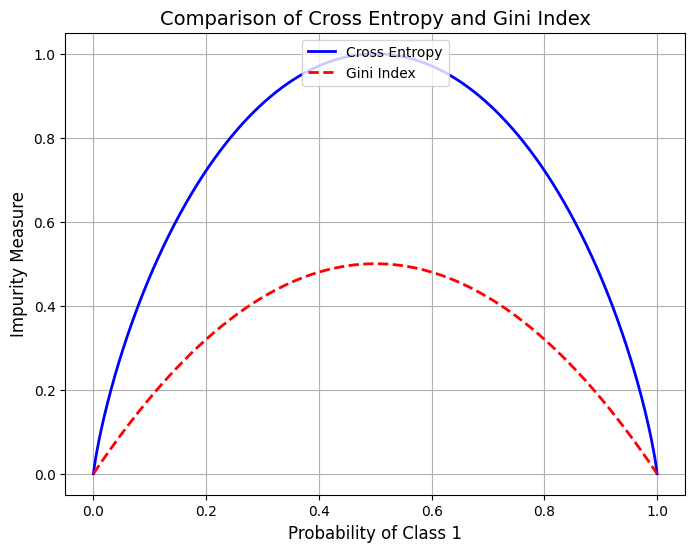

In [364]:
import numpy as np
import matplotlib.pyplot as plt

def cross_entropy(prob_class1):
    """
    Returns the cross-entropy value of a node given the probability of a sample belonging to class 1 in the node.
    """
    if prob_class1 == 0 or prob_class1 == 1:
        return 0  # Avoid log(0) issue, as entropy is 0 when p = 0 or 1
    return -prob_class1 * np.log2(prob_class1) - (1 - prob_class1) * np.log2(1 - prob_class1)

def gini_index(prob_class1):
    """
    Returns the gini-index value of a node given the probability of a sample belonging to class 1 in the node.
    """
    return 2 * prob_class1 * (1 - prob_class1)

def impurity_measures_plot():
    """
    Plots the cross-entropy and gini index values with respect to the probability values of class 1.
    """
    # Define the range of class 1 probabilities
    prob_class1_arr = np.arange(0, 1.001, 0.001)

    # Calculate the cross-entropy and gini index values
    ce_arr = np.array([cross_entropy(p) for p in prob_class1_arr])
    gi_arr = np.array([gini_index(p) for p in prob_class1_arr])

    # Plot both measures on the same graph
    plt.figure(figsize=(8, 6))
    plt.plot(prob_class1_arr, ce_arr, label='Cross Entropy', color='blue', linestyle='-', linewidth=2)
    plt.plot(prob_class1_arr, gi_arr, label='Gini Index', color='red', linestyle='--', linewidth=2)

    # Add labels, title, and legend
    plt.xlabel('Probability of Class 1', fontsize=12)
    plt.ylabel('Impurity Measure', fontsize=12)
    plt.title('Comparison of Cross Entropy and Gini Index', fontsize=14)
    plt.legend(loc='upper center')

    # Show the plot
    plt.grid(True)
    plt.show()

# Call the function to generate the plot
impurity_measures_plot()


## **3.2. Reduction in Impurity [6 pts]**

Recall that we also discussed information gain which is the change in entropy from the parent node to the children nodes. Gini reduction is similar to information gain except you replace entropy values with gini index.

### **3.2.1. Information Gain [3 pts, autograded]**

In [365]:
import numpy as np

def information_gain(num_samples_parent, num_class1_parent,
                     num_samples_child1, num_class1_child1):
    """
    Args:
        num_samples_parent: Number of samples in the parent node
        num_class1_parent: Number of samples of class 1 in parent node
        num_samples_child1: Number of samples in the first child node
        num_class1_child1: Number of samples of class 1 in the first child node

    Returns:
        ig: Information Gain
    """

    # Helper function to compute entropy
    def compute_entropy(num_samples, num_class1):
        if num_samples == 0:
            return 0  # Avoid division by zero
        p1 = num_class1 / num_samples  # Probability of class 1
        p0 = 1 - p1  # Probability of class 0

        # Handle edge cases where probabilities are 0 to avoid log(0)
        entropy_value = 0
        if p1 > 0:
            entropy_value -= p1 * np.log2(p1)
        if p0 > 0:
            entropy_value -= p0 * np.log2(p0)

        return entropy_value

    # Calculate entropies for parent and child nodes
    parent_entropy = compute_entropy(num_samples_parent, num_class1_parent)
    child1_entropy = compute_entropy(num_samples_child1, num_class1_child1)

    # Calculate entropy for the second child (remaining samples)
    num_samples_child2 = num_samples_parent - num_samples_child1
    num_class1_child2 = num_class1_parent - num_class1_child1
    child2_entropy = compute_entropy(num_samples_child2, num_class1_child2)

    # Weighted average entropy of the children
    weighted_child_entropy = (
        (num_samples_child1 / num_samples_parent) * child1_entropy +
        (num_samples_child2 / num_samples_parent) * child2_entropy
    )

    # Calculate information gain
    ig = parent_entropy - weighted_child_entropy

    return ig

# Test the function with the provided assertion
assert np.abs(information_gain(100, 60, 30, 5) - 0.251) < 0.01


In [366]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_information_gain', answer = (grader_serialize(cross_entropy), grader_serialize(information_gain)))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **3.2.2. Gini Reduction [3 pts, autograded]**

In [367]:
import numpy as np

def gini_reduction(num_samples_parent, num_class1_parent,
                   num_samples_child1, num_class1_child1):
    """
    Args:
        num_samples_parent: Number of samples in the parent node
        num_class1_parent: Number of samples of class 1 in parent node
        num_samples_child1: Number of samples in the first child node
        num_class1_child1: Number of samples of class 1 in the first child node

    Returns:
        gr: Gini Reduction
    """

    # Helper function to compute Gini impurity
    def gini_impurity(num_samples, num_class1):
        if num_samples == 0:
            return 0  # Avoid division by zero
        p1 = num_class1 / num_samples  # Probability of class 1
        p0 = 1 - p1  # Probability of class 0
        return 1 - (p1 ** 2 + p0 ** 2)

    # Calculate Gini impurity for the parent node
    parent_gini = gini_impurity(num_samples_parent, num_class1_parent)

    # Calculate Gini impurity for the first child node
    child1_gini = gini_impurity(num_samples_child1, num_class1_child1)

    # Calculate Gini impurity for the second child node
    num_samples_child2 = num_samples_parent - num_samples_child1
    num_class1_child2 = num_class1_parent - num_class1_child1
    child2_gini = gini_impurity(num_samples_child2, num_class1_child2)

    # Weighted average Gini impurity of the children
    weighted_child_gini = (
        (num_samples_child1 / num_samples_parent) * child1_gini +
        (num_samples_child2 / num_samples_parent) * child2_gini
    )

    # Calculate Gini reduction
    gr = parent_gini - weighted_child_gini

    return gr

# Test the function with the provided assertion
assert np.abs(gini_reduction(100, 60, 30, 5) - 0.161) < 0.01


In [368]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_gini_reduction', answer = (grader_serialize(gini_index), grader_serialize(gini_reduction)))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# **4. Decision Tree [35 pts]**

In this section you will be training a decision tree classifier to predict the presence of diabetes in a person given various input features. The diabetes dataset that we are using is from the [2013-2014  National Health and Nutrition Examination Survey (NHANES)](https://wwwn.cdc.gov/nchs/nhanes/Default.aspx). We have reduced the dataset to only 20 features but the original dataset had over 1,800 features. `cis519_hw1_diabetes_train.csv` and `cis519_hw1_diabetes_X_test.csv` are the datasets that you would be using for training and testing respectively.

## **4.1. Load Datasets**

Read the files `cis519_hw1_diabetes_train.csv` and `cis519_hw1_diabetes_X_test.csv` into train_df and test_df respectively in the `load_diabetes_datasets` function.

In [369]:
import pandas as pd

def load_diabetes_datasets():
    '''
    Args:
        None
    Returns:
        train_df, test_df
    '''

    # TODO START: Complete the function
    train_df = pd.read_csv('cis519_hw1_diabetes_train.csv')
    test_df = pd.read_csv('cis519_hw1_diabetes_X_test.csv')
    return train_df, test_df

    # TODO END

## **4.2. Preprocess Datasets [10 pts, autograded]**

The datasets we have provided are not ready-to-use for machine learning and requires preprocessing. We want you to perform feature selection and handle missing values in both the training and test datasets.

### **4.2.1. Feature Selection**

For feature selection, you should retain the following features at least and experiment including/excluding the remaining features.

- 'RIDAGEYR'
- 'BMXWAIST'
- 'BMXHT'
- 'LBXTC'
- 'BMXLEG'
- 'BMXWT'
- 'BMXBMI'
- 'RIDRETH1'
- 'BPQ020'
- 'ALQ120Q'
- 'DMDEDUC2'
- 'RIAGENDR'
- 'INDFMPIR'

The column `DIABETIC` in the training dataset is the target variable.

### **4.2.2. Handling Missing Values**

We recommend you to drop rows with missing values in the training set. However, you should not drop rows with missing values in the test set. Instead, you should impute missing values in the test set with the mean of the corresponding columns in the training set.

In [370]:
train_df, test_df = load_diabetes_datasets()

from sklearn.impute import SimpleImputer

def preprocess_datasets(train_df, test_df):
    '''
    Args:
        train_df: DataFrame containing the training data
        test_df: DataFrame containing the test data
    Returns:
        train_df (preprocessed): Preprocessed training DataFrame
        test_df (preprocessed): Preprocessed test DataFrame
    '''

    # Feature selection: Retain the specified columns in train and test datasets
    selected_features = [
        'RIDAGEYR', 'BMXWAIST', 'BMXHT', 'LBXTC', 'BMXLEG',
        'BMXWT', 'BMXBMI', 'RIDRETH1', 'BPQ020', 'ALQ120Q',
        'DMDEDUC2', 'RIAGENDR', 'INDFMPIR',  'DIABETIC'
    ]

    # Select relevant columns in the training dataset
    train_df = train_df[selected_features]

    # Test dataset should have all columns except the target column 'DIABETIC'
    test_features = selected_features[:-1]
    test_df = test_df[test_features]

    # Drop rows with missing values in the training dataset
    train_df = train_df.dropna()

    # Impute missing values in the test dataset with the mean of the corresponding columns in the training set
    imputer = SimpleImputer(strategy='mean')
    test_df_imputed = imputer.fit_transform(test_df)

    # Convert the imputed numpy array back to a DataFrame with appropriate column names
    test_df = pd.DataFrame(test_df_imputed, columns=test_features)

    return train_df, test_df

# Example usage
train_df_processed, test_df_processed = preprocess_datasets(train_df, test_df)


In [371]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_preprocess_datasets', answer = (train_df_processed.to_csv(index=False), test_df_processed.to_csv(index=False)))

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **4.3. Decision Tree Training with Pruning [14 pts autograded]**

Next, we will be fitting a decision tree classifier and prune the tree appropriately. The `DecisionTreeClassifier` in scikit-learn uses a way of pruning called **Minimal Cost-Complexity Pruning**. We won't cover the specifics, but you can learn more from this [link](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning) if you wish. But, you don't need to learn the details in order to use it effectively. The amount of pruning is entirely dependent on the value of the `ccp_alpha` parameter. In order to tune the `ccp_alpha` parameter, you will use [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html). The purpose of cross-validation is to estimate how well a model will generalize on unseen data.

Implement the function `best_ccp_alpha_f1` to do automatic tuning of the `ccp_alpha` parameter.  Your function should vary the value of the `ccp_alpha` parameter and return the value for `ccp_alpha` with the highest cross-validation F1 score over the given dataset `train_df`. The sklearn library has a [built-in function](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.cost_complexity_pruning_path) to generate a list of effective ccp_alphas. Given the imbalanced nature of the dataset, most of the people in the data set are non-diabetic. You can get a model with very high test accuracy by always predicting no one is diabetic. To address this problem, more importance should be given to the [F1 score](https://en.wikipedia.org/wiki/F-score) of your model rather than the classification accuracy.

Once you are done with your modeling process, test your model on the test dataset and output your predictions into the PennGrader.

For this problem, you need to have at least 80% accuracy and a F1 score of 0.2 on the test dataset to get full points.

In [372]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

def best_ccp_alpha_f1(train_df):
    """
    Returns the pruning parameter (best_ccp_alpha) with the highest cross-validation F1 score
    along with the five cross-validation F1 scores corresponding (cv_f1_scores).

    Args:
        train_df: Preprocessed training DataFrame

    Returns:
        best_ccp_alpha: the tuned best ccp alpha value
        cv_f1_scores: the five cross-validation F1 scores
    """

    # Separate features and target variable from train_df
    X_train = train_df.drop(columns=['DIABETIC'])
    y_train = train_df['DIABETIC']

    # Fit an initial decision tree to find the effective ccp_alphas
    clf = DecisionTreeClassifier(random_state=0)
    path = clf.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas

    best_ccp_alpha = None
    best_f1_score = -1  # Initialize with a low score
    cv_f1_scores = []   # Store the cross-validation F1 scores for the best alpha

    # Iterate over the possible ccp_alphas
    for alpha in ccp_alphas:
        clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
        f1_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
        mean_f1 = np.mean(f1_scores)

        # Keep track of the best alpha and its F1 scores
        if mean_f1 > best_f1_score:
            best_f1_score = mean_f1
            best_ccp_alpha = alpha
            cv_f1_scores = f1_scores

    return best_ccp_alpha, cv_f1_scores

def refit_and_predict(train_df, test_df, best_ccp_alpha):
    """
    Fit a decision tree classifier on the training data using the best_ccp_alpha value and
    output the predictions on the test set.

    Args:
        train_df: Preprocessed training DataFrame
        test_df: Preprocessed test DataFrame
        best_ccp_alpha: The best pruning parameter value

    Returns:
        y_test_pred: The predicted values for the test set
    """

    # Separate features and target variable from train_df
    X_train = train_df.drop(columns=['DIABETIC'])
    y_train = train_df['DIABETIC']

    # Train the DecisionTreeClassifier with the best ccp_alpha
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_ccp_alpha)
    clf.fit(X_train, y_train)

    # Make predictions on the test dataset
    y_test_pred = clf.predict(test_df)

    return y_test_pred

# Example usage
train_df_processed, test_df_processed = preprocess_datasets(train_df, test_df)
best_ccp_alpha, cv_f1_scores = best_ccp_alpha_f1(train_df_processed)
y_test_pred_DT = refit_and_predict(train_df_processed, test_df_processed, best_ccp_alpha)

print(f"Best ccp_alpha: {best_ccp_alpha}")
print(f"Cross-validation F1 scores: {cv_f1_scores}")
print(f"Test Predictions: {y_test_pred_DT}")


Best ccp_alpha: 0.0005555555555555556
Cross-validation F1 scores: [0.26744186 0.28776978 0.37349398 0.35502959 0.37869822]
Test Predictions: [0 0 0 ... 0 1 0]


In [ ]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_refit_and_predict', answer = y_test_pred_DT)

## **4.4. Computing Confidence Intervals [5 pts, autograded]**

Even though you may have computed the average F1 score across the held-out folds during cross validation, how confident can you be that the number you computed is the true F1 score for that set of features? If you try rerunning your code with a different random seed, you may actually get a different F1 score. But which one is right?

In order to answer this question, we will compute a confidence interval based on the Student's t-distribution, which will tell us with 99\% confidence that the true mean is within a lower and upper bound. To compute the confidence interval, we need to compute the sample mean, $\bar{x}$, sample standard deviation, $S$, and the number of observations for each classifier, $n$. ***In our specific case, the number of observations should be 5 because we have 5 reported F1 scores from cross-validation.***

Then, the confidence interval is computed by
    
$$\bar{x} \pm t \cdot \frac{S}{\sqrt{n}}$$

Here, $t$ is the critical value, which we can look up using the provided t-table (https://www.stat.colostate.edu/inmem/gumina/st201/pdf/Utts-Heckard_t-Table.pdf). (Round up the critical value to the second digit below the decimal point) For example, when $n=10$, if we are looking for a 99\% confidence interval, then the number in the 99\% confidence column with degrees of freedom of $n-1=9$ would be $t=3.25$. Then, we can plug in all of the statistics into the confidence interval formula and get a range of values for which we are 99\% confident that the true F1 score of the classifier falls between.

For this computation, we should use the unbiased estimator of the variance, which means that the degrees of freedom on the standard deviation calculation must be set. Look in the optional arguments of np.std to learn more.

In [ ]:
import numpy as np

def calculate_confidence_interval(cv_f1_scores, confidence_level=0.99):
    '''
    Args:
        cv_f1_scores      :   np.array, reported cross-validation F1 scores
        confidence_level  :   float, the desired confidence level (default is 0.99)
    Returns:
        interval    :   np.array, lower bound and upper bound of the confidence interval
    '''
    n = len(cv_f1_scores)  # Number of observations
    mean_f1 = np.mean(cv_f1_scores)  # Sample mean
    std_f1 = np.std(cv_f1_scores, ddof=1)  # Sample standard deviation (unbiased)

    # Degrees of freedom
    df = n - 1

    # Use t-critical values based on the provided image
    if confidence_level == 0.99:
        t_critical_values = {
            4: 4.60,  # For df = 4 (n - 1 = 4 when n = 5)
        }
    elif confidence_level == 0.80:
        t_critical_values = {
            4: 1.53,
        }

    t_critical = t_critical_values.get(df, 1.96)  # Default to 1.96 if df not found

    # Margin of error
    margin_of_error = t_critical * (std_f1 / np.sqrt(n))

    # Confidence interval
    lower_bound = mean_f1 - margin_of_error
    upper_bound = mean_f1 + margin_of_error

    return np.array([lower_bound, upper_bound])

# Example usage with the test case data
data = np.array([15.6, 16.2, 22.5, 20.5, 16.4])
print(calculate_confidence_interval(data))  # Expected output should match the test case


In [ ]:
def test_confidence_intervals():
    data = np.array([15.6, 16.2, 22.5, 20.5, 16.4])
    result = np.round(calculate_confidence_interval(data), 3)
    interval = np.array([11.918, 24.562])
    assert (np.array_equal(interval, result))

test_confidence_intervals()

In [ ]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_confidence_intervals', answer = grader_serialize(calculate_confidence_interval))

## **4.5. Performance Table [6 pts, manually graded]**

Repeat the process for two other sets of features and present a performance table (like the one shown below) that compares the F1 scores and confidence intervals of the three sets of features, indicating which one is your chosen best set. Remember that each set should include the 13 features mentioned earlier. As mentioned earlier, submit this table along with the written homework solutions as this is manually graded.

set_1_features = required_features  

set_2_features = required_features + ['OHQ575Q', 'LBDSGBSI']  

set_3_features = required_features + ['OHQ565', 'OHX28CSC', 'OHX19SE']

---

S.No. | Features | Best CCP Alpha | Mean Cross-validation F1 Score | Cross-validation F1 Score Confidence Interval
--- | --- | --- | --- | ---
1 | Set 1 |0.000556 |0.33|  [0.23, 0.44]
2 | Set 2 | 0.000556 |0.33|  [0.23, 0.44]
3 | Set 3 | 0.000556 |0.33|  [0.23, 0.44]

I am getting identical values for all 3 sets, this suggests that the additional features are not impacting the model performance.


In [373]:
# List of required features (from your earlier steps)
required_features = [
    'RIDAGEYR', 'BMXWAIST', 'BMXHT', 'LBXTC', 'BMXLEG',
    'BMXWT', 'BMXBMI', 'RIDRETH1', 'BPQ020', 'ALQ120Q',
    'DMDEDUC2', 'RIAGENDR', 'INDFMPIR'
]

def print_null_counts_non_required(df, required_features):
    """
    Prints the features that are not in the required list, along with their null value counts.

    Args:
        df: The DataFrame to inspect for null values.
        required_features: List of required features to exclude from the report.
    """
    # Filter out required features from the DataFrame columns
    non_required_features = [col for col in df.columns if col not in required_features]

    # Get null counts for non-required features only
    null_counts = df[non_required_features].isnull().sum()

    # Print the results
    print("Non-Required Feature | Number of Null Values")
    print("--------------------------------------------")
    for feature, count in null_counts.items():
        print(f"{feature:20} | {count}")

# Load datasets
train_df = pd.read_csv('cis519_hw1_diabetes_train.csv')
test_df = pd.read_csv('cis519_hw1_diabetes_X_test.csv')

# Print null counts for non-required features in the test dataset
print("Null Value Counts in Non-Required Features (Test Data):")
print_null_counts_non_required(test_df, required_features)


Null Value Counts in Non-Required Features (Test Data):
Non-Required Feature | Number of Null Values
--------------------------------------------
OHQ575Q              | 2004
LBDSGBSI             | 744
OHQ565               | 1476
OHX28CSC             | 1762
OHX19SE              | 1378
URDECPLC             | 1491
BPAARM               | 546


In [374]:
import pandas as pd
import numpy as np

# Define feature sets manually for clarity
required_features = [
    'RIDAGEYR', 'BMXWAIST', 'BMXHT', 'LBXTC', 'BMXLEG',
    'BMXWT', 'BMXBMI', 'RIDRETH1', 'BPQ020', 'ALQ120Q',
    'DMDEDUC2', 'RIAGENDR', 'INDFMPIR'
]

set_1_features = required_features  # Set 1: Only required features
set_2_features = required_features + ['OHQ575Q', 'LBDSGBSI']  # Set 2
set_3_features = required_features + ['OHQ565', 'OHX28CSC', 'OHX19SE']  # Set 3

feature_sets = [set_1_features, set_2_features, set_3_features]  # Combine all sets

def create_performance_table(train_df, test_df):
    results = []

    for i, feature_set in enumerate(feature_sets, 1):
        # Preprocess datasets with the current feature set
        train_processed, test_processed = preprocess_datasets(
            train_df[feature_set + ['DIABETIC']], test_df[feature_set]
        )

        # Get the best CCP alpha and corresponding F1 scores
        best_alpha, cv_f1_scores = best_ccp_alpha_f1(train_processed)

        # Calculate the confidence interval for F1 scores
        conf_interval = calculate_confidence_interval(cv_f1_scores)

        mean_f1_score = np.mean(cv_f1_scores)
        results.append({
            "S.No.": f"Set {i}",
            "Features": ', '.join(feature_set),  # Convert feature list to a string
            "Best CCP Alpha": best_alpha,
            "Mean F1 Score": f"{mean_f1_score:.2f}",
            "F1 Score Confidence Interval": f"[{conf_interval[0]:.2f}, {conf_interval[1]:.2f}]"
        })

    # Create a DataFrame for readability
    performance_table = pd.DataFrame(results)
    pd.set_option('display.max_colwidth', None)  # Prevent truncation of long text

    return performance_table

# Load the datasets
train_df, test_df = load_diabetes_datasets()

# Generate and print the performance table
#performance_table = create_performance_table(train_df, test_df)
#print(performance_table)


# **5 Fit the Logistic Regression on Diabetes dataset (With only the required features in 4.2) [14 pts, autograded]**

Fit a simple logistic regression on the training data using l2 penalty, $\alpha$ = 0.01, maximum of iterations = 1000, and weight for the regularization consant for the l2 penalty  term is 0.001.
You should be rescaling features using MinMaxScaler from sklearn.preprocessing to make sure that the features are properly scaled for learning.

In [375]:
train_df, test_df = load_diabetes_datasets()
train_df, test_df = preprocess_datasets(train_df, test_df)

In [376]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

def fit_and_predict_logistic(train_df, test_df):
    """
    Fit a logistic regression classifier on the training data and output the predictions on the
    test set.

    Args:
        train_df: Preprocessed training DataFrame
        test_df: Preprocessed test DataFrame

    Returns:
        y_test_pred: The predicted values for the test set
    """

    # Separate features and target variable from train_df
    X_train = train_df.drop(columns=['DIABETIC'])
    y_train = train_df['DIABETIC']

    # Apply MinMaxScaler to rescale the features
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(test_df)

    # Define and fit the logistic regression model
    clf = LogisticRegression(
        penalty='l2',              # L2 regularization
        C=1/0.001,                 # Regularization constant (inverse of lambda)
        solver='lbfgs',            # Recommended solver for small datasets
        max_iter=1000,             # Maximum number of iterations
        tol=0.01,                  # Tolerance for convergence
        random_state=42            # For reproducibility
    )
    clf.fit(X_train_scaled, y_train)

    # Predict the test set
    y_test_pred = clf.predict(X_test_scaled)

    return y_test_pred

# Usage example
train_df, test_df = load_diabetes_datasets()
train_df, test_df = preprocess_datasets(train_df, test_df)

y_test_pred_logistic = fit_and_predict_logistic(train_df, test_df)
print(y_test_pred_logistic)


[0 0 0 ... 0 0 0]


In [377]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_fit_and_predict_logistic', answer = y_test_pred_logistic)

Correct! You earned 14/14 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# **6 Neural Networks and Comparing LR, NN, and DT [20pts]**

Similar to question 5, fit the Neural Network you coded in question 2 on the diabetes datasets.

## **6.0 Neural Networks Visualization [0pts]**
<!-- `Cite: TensorFlow` -->

Hi, folks! Have you found it difficult to visualize the neural networks properly before? Or do you want to change the learning rate, number of hidden layers, etc. happily and visually see their influence on the final result immediately? **This part is for you to play and you don't need to code.**

We found a good material provided by TensorFlow. It can help you better understand the structure of the more complex NN model outside the classroom. Here you can see an interface similar to the one below. You can choose the one you want to try from 4 data sets, Ratio of training to test data, Noise rate, Batch size, Category of features, the number of hidden layers, number of neurons in a hidden layer, the learning rate, activation function, regularization type, regularization rate, and your task types to see how these influence the processes and the results.

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2,2,2,2,2&seed=0.32529&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

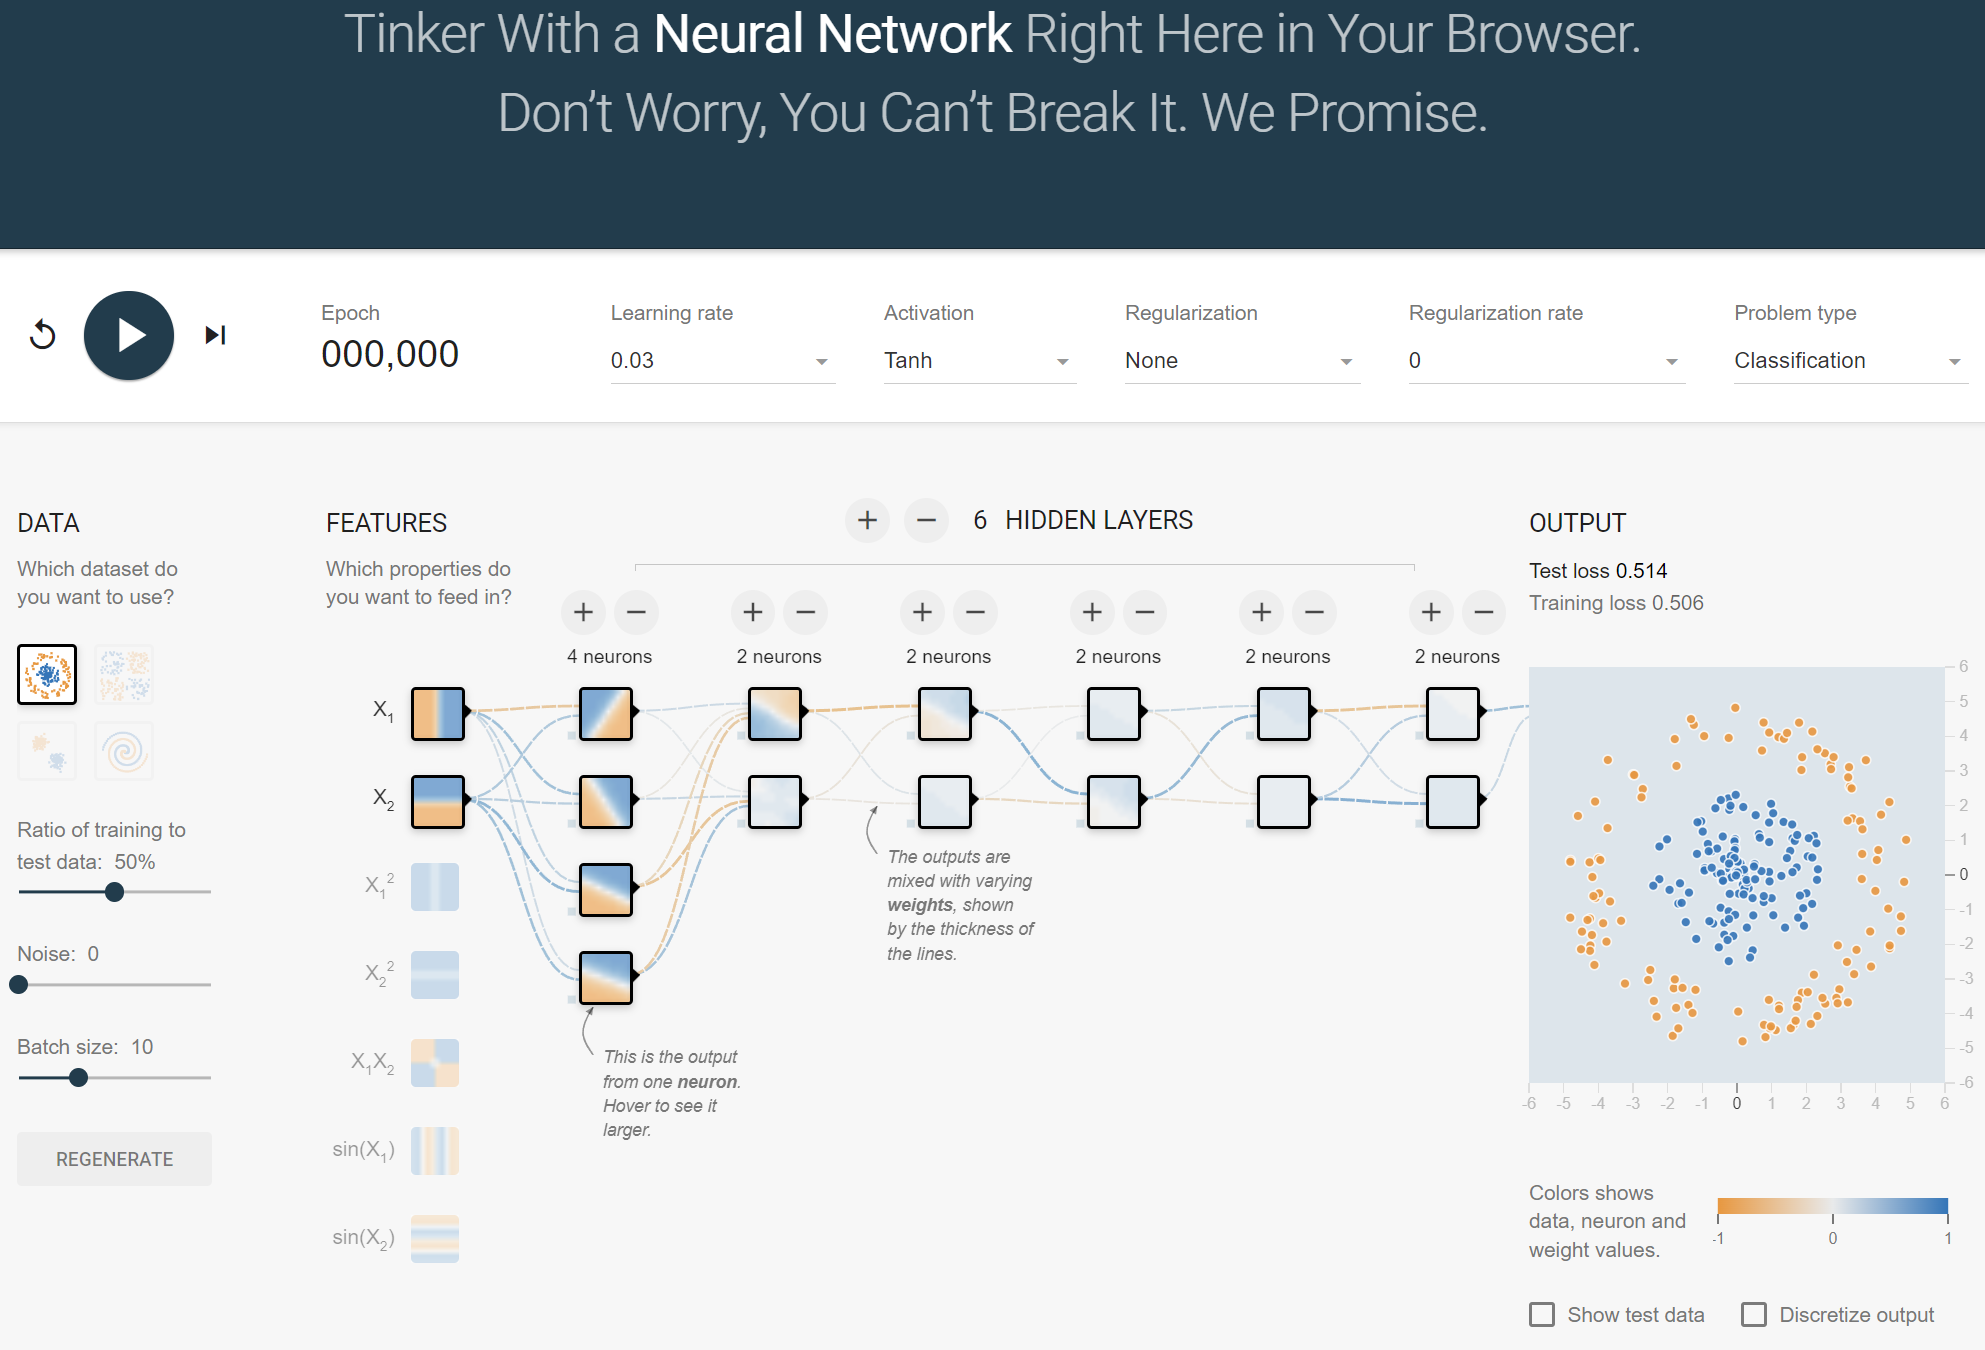

## **6.1 Code a Simple Neural Network Model [14pts, autograded]**

PyTorch is a powerful and flexible deep learning framework widely used for building, training, and experimenting with neural networks. Its key feature is the dynamic computational graph, which allows the network architecture to be modified on-the-fly during execution, making debugging and experimentation easier compared to static graph frameworks. PyTorch’s **Autograd** module automatically handles the computation of gradients during the backpropagation process, which is crucial for training neural networks. With native support for GPU acceleration, it enables fast computation of tensor operations, speeding up the training process for large-scale models. These features, combined with its user-friendly interface and extensive ecosystem, make PyTorch ideal for both research and real-world applications.

We will use it to build a simple 2 hidden layered neural network. Since this is a simple network, we will code and use a custom autograd. Under the hood, each primitive autograd operator is really two functions that operate on Tensors. The forward function computes output Tensors from input Tensors. The backward function receives the gradient of the output Tensors with respect to some scalar value, and computes the gradient of the input Tensors with respect to that same scalar value.

In PyTorch we can easily define our own autograd operator by defining a subclass of torch.autograd.Function and implementing the forward and backward functions. We can then use our new autograd operator by constructing an instance and calling it like a function, passing Tensors containing input data.

Please refer the below helpful links: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html, https://pytorch.org/docs/stable/notes/extending.html#extending-torch-autograd to understand the below tasks and make them easy to code. We want to use this way of training model so that you may get an idea as to how training works under the hood. From the next homework i.e. CNNs we will use very easy version of pytorch implementation.

In [378]:
train_df, test_df = load_diabetes_datasets()
train_df, test_df = preprocess_datasets(train_df, test_df)

In [379]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(42)

In [380]:
class CustomLinearFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, weight, bias):
        ctx.save_for_backward(input, weight, bias)
        output = input @ weight.T + bias  # Matrix multiplication
        return output

    @staticmethod
    def backward(ctx, grad_output):
        input, weight, bias = ctx.saved_tensors
        grad_input = grad_weight = grad_bias = None

        if ctx.needs_input_grad[0]:
            grad_input = grad_output @ weight  # (N, in_features)
        if ctx.needs_input_grad[1]:
            grad_weight = grad_output.T @ input  # (out_features, in_features)
        if ctx.needs_input_grad[2]:
            grad_bias = grad_output.sum(dim=0)  # (out_features,)

        return grad_input, grad_weight, grad_bias

In [381]:
class CustomLinear(nn.Module):
    def __init__(self, in_features, out_features):
        super(CustomLinear, self).__init__()
        self.weight = nn.Parameter(torch.empty(out_features, in_features))
        self.bias = nn.Parameter(torch.empty(out_features))
        self.reset_parameters()

    def reset_parameters(self):
        nn.init.normal_(self.weight, mean=0, std=0.02)
        nn.init.zeros_(self.bias)

    def forward(self, input):
        return CustomLinearFunction.apply(input, self.weight, self.bias)

In [382]:
class CustomNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(CustomNeuralNetwork, self).__init__()
        self.layer1 = CustomLinear(input_size, hidden_size1)
        self.layer2 = CustomLinear(hidden_size1, hidden_size2)
        self.output_layer = CustomLinear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        output = torch.sigmoid(self.output_layer(x))  # Sigmoid for binary classification
        return output


## **6.2 Fit the Neural Network on Diabetes Dataset (With only the requiredfeatures in 4.2)**

In [383]:
# Preprocess data with MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_df.iloc[:, :-1].values)
y_train = train_df.iloc[:, -1].values
X_test = scaler.transform(test_df.values)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # (N, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Define network dimensions
input_size = X_train_tensor.shape[1]  # Number of features
hidden_size1 = 64
hidden_size2 = 32
output_size = 1  # Binary classification

# Instantiate the neural network
model = CustomNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.AdamW(model.parameters(), lr=0.01, weight_decay=0.001)

# Training parameters
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode

    # Forward pass
    y_pred = model(X_train_tensor)

    # Compute loss
    loss = criterion(y_pred, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update model parameters

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation mode
model.eval()

# Disable gradient computation for inference
with torch.no_grad():
    # Take inference on the test data
    predictions = model(X_test_tensor)

    # Convert predictions to numpy and squeeze output
    predictions_np = predictions.squeeze().numpy()

# Convert predictions to binary (0 or 1) based on threshold 0.5
y_test_pred_NN = (predictions_np >= 0.5).astype(int)

# Output predictions
print("Inference complete. Predictions:")
print(y_test_pred_NN)


Epoch [100/1000], Loss: 0.3173
Epoch [200/1000], Loss: 0.3082
Epoch [300/1000], Loss: 0.3021
Epoch [400/1000], Loss: 0.2960
Epoch [500/1000], Loss: 0.2917
Epoch [600/1000], Loss: 0.2891
Epoch [700/1000], Loss: 0.2867
Epoch [800/1000], Loss: 0.2845
Epoch [900/1000], Loss: 0.2804
Epoch [1000/1000], Loss: 0.2767
Inference complete. Predictions:
[0 0 0 ... 0 0 0]


In [384]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_fit_and_predict_NN', answer = y_test_pred_NN)

Correct! You earned 14/14 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **6.3 Best Model on Diabetes Dataset, and Why. [6pts, manually graded]**

Which one of Logistic Regression, Neural Network, and Decision Tree will provide the best performance on this dataset. Give reasons for your answer.

I think Decision Tree provides the best performance on the data set.

Reasoning:
1. The relationships between the features are non-linear so Logistic Regression cannot to a great job.
2.We can see that we have pruned our tree carefully. Adding paramters to our model did not affect model performance (Q4.5).
3. Neural Network need careful tuning to avoid overfitting, and we have not done that yet

# Submission

- Submit the notebook as a `.ipynb` file to the coding portion of the Gradescope submission. This can be done in Google Colab via the `File - Download .ipynb` menu option.